In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

The $SABA_{2}C = C(SABA_2)C$ intergrator of the Henon-Heiles Hamiltonian - we employ this to compute the maximal Lyapunov characteristic exponents (mLCE).
This symplectic integrator is of order 4

In [2]:
start_time = time.time()
#integration of the Henon-Heiles system
N = 1000
a = 0
b = 25
h = 0.05#(b-a)/N
H = 1/8                             #the total energy of the system

In [3]:
#intialize vectors
x_c1 = np.zeros(N, dtype = 'float')
y_c1 = np.zeros(N, dtype = 'float')
px_d1 = np.zeros(N, dtype = 'float')
py_d1 = np.zeros(N, dtype = 'float')
x_c2 = np.zeros(N, dtype = 'float')
y_c2 = np.zeros(N, dtype = 'float')
px_c = np.zeros(N, dtype = 'float')
py_c = np.zeros(N, dtype = 'float')

#intialize vectors
x2_c1 = np.zeros(N, dtype = 'float')
y2_c1 = np.zeros(N, dtype = 'float')
px2_d1 = np.zeros(N, dtype = 'float')
py2_d1 = np.zeros(N, dtype = 'float')
x2_c2 = np.zeros(N, dtype = 'float')
y2_c2 = np.zeros(N, dtype = 'float')
px2_c = np.zeros(N, dtype = 'float')
py2_c = np.zeros(N, dtype = 'float')
H_new = np.zeros(N, dtype = 'float')
error = np.zeros(N, dtype = 'float')

In [4]:
#intialize deviation vectors
dx_c1 = np.zeros(N, dtype = 'float')
dy_c1 = np.zeros(N, dtype = 'float')
dpx_d1 = np.zeros(N, dtype = 'float')
dpy_d1 = np.zeros(N, dtype = 'float')
dx_c2 = np.zeros(N, dtype = 'float')
dy_c2 = np.zeros(N, dtype = 'float')
dpx_c = np.zeros(N, dtype = 'float')
dpy_c = np.zeros(N, dtype = 'float')

dx2_c1 = np.zeros(N, dtype = 'float')
dy2_c1 = np.zeros(N, dtype = 'float')
dpx2_d1 = np.zeros(N, dtype = 'float')
dpy2_d1 = np.zeros(N, dtype = 'float')
dx2_c2 = np.zeros(N, dtype = 'float')
dy2_c2 = np.zeros(N, dtype = 'float')
dpx2_c = np.zeros(N, dtype = 'float')
dpy2_c = np.zeros(N, dtype = 'float')

In [5]:
#set intial conditions 
x0 = 0
y0 = -0.25
py0 = 0

#set initial conditions of the deviation vectors
dx0=1
dy0 = 0
dpx0 = 0
dpy0 = 0
#define dunction to find px0
def initial_px(x0, y0, py0):
    return np.sqrt(2*H - py0**2  - y0**2 - 2*x0**2*y0 + (2/3)*y0**2)
px0 = initial_px(x0, y0, py0)

In [6]:
#function for normalizing deviation vectors
def alpha(dx, dy, dpx, dpy):
    return np.linalg.norm([dx, dy, dpx, dpy])

In [7]:
#normalize the intial deviation vector
dx0 = dx0/alpha(dx0, dy0, dpx0, dpy0)

In [8]:
#set the integration constants
c1 = 1/2 - np.sqrt(3)/6
c2 = np.sqrt(3)/3
d1 = 1/2
c = (2 - np.sqrt(3))/24

In [9]:
#empty vector to store the evolution of the X_1(t)
LCE = np.zeros(N, dtype = 'float')
RLI = np.zeros(N, dtype = 'float')
vec = np.zeros(N, dtype = 'float')
vec_new = np.zeros(N, dtype = 'float')
vec_new2 = np.zeros(N, dtype = 'float')

In [10]:
##===================Inputs for the computation of the RLI===================##
#To compute the Relative Lyapunov Indicator two initial conditions that are close together are needed.
#1.) Start by computing DeltaLI = ||LI(x_0 + deltax;t) - LI(x_0;t)||
#2.) Then compute  RLI = (1/t)*sum(Delta LI(x_0, i*deltat))

In [11]:
i = 0
#intial conditions (of deviation vectors) of choice 
x_vals  = [1, 1+1e-14]
while i<N-1:
    #filling the first entries
    px_c[0] = px0
    py_c[0] = py0
    x_c1[0] = x0
    y_c1[0] = y0
    
    px_c[i+1] = px_c[i] + c*(h**3)*x_c1[i]*(1 + 2*x_c1[i]**2 + 6*y_c1[i]  + 2*y_c1[i]**2)
    py_c[i+1] = py_c[i] + c*(h**3)*(y_c1[i] - 3*y_c1[i]**2 + 2*y_c1[i]**3 + 3*x_c1[i]**2 + 2*(x_c1[i]**2)*y_c1[i])
    
    
    x_c1[i+1] = x_c1[i] + c1*h*px_c[i+1]
    y_c1[i+1] = y_c1[i] + c1*h*py_c[i+1]
    
    
    px_d1[i] = px_c[i+1] - d1*h*x_c1[i+1]*(1 + 2*y_c1[i+1])
    py_d1[i] = py_c[i+1] + d1*h*(y_c1[i+1]**2 - x_c1[i+1]**2  - y_c1[i+1])

    
    x_c2[i] = x_c1[i+1] + c2*h*px_d1[i]
    y_c2[i] = y_c1[i+1] + c2*h*py_d1[i]
    
    
    px_d1[i+1] = px_d1[i] - d1*h*x_c2[i]*(1 + 2*y_c2[i])
    py_d1[i+1] = py_d1[i] + d1*h*(y_c2[i]**2 - x_c2[i]**2  - y_c2[i])
    
    
    x_c1[i+1] = x_c2[i] + c1*h*px_d1[i+1]
    y_c1[i+1] = y_c2[i] + c1*h*py_d1[i+1]
    
    px_c[i+1] = px_d1[i+1] + c*(h**3)*x_c1[i+1]*(1 + 2*x_c1[i+1]**2 + 6*y_c1[i+1]  + 2*y_c1[i+1]**2)
    py_c[i+1] = py_d1[i+1] + c*(h**3)*(y_c1[i+1] - 3*y_c1[i+1]**2 + 2*y_c1[i+1]**3 + 3*x_c1[i+1]**2 + 2*(x_c1[i+1]**2)*y_c1[i+1])
    
    
    
    #intergrate the perturbed set of vectors
    
    #filling the first entries
    px2_c[0] = px0 + 1e-14
    py2_c[0] = py0 + 1e-14
    x2_c1[0] = x0 + 1e-14
    y2_c1[0] = y0 + 1e-14
    
    px2_c[i+1] = px2_c[i] + c*(h**3)*x2_c1[i]*(1 + 2*x2_c1[i]**2 + 6*y2_c1[i]  + 2*y2_c1[i]**2)
    py2_c[i+1] = py2_c[i] + c*(h**3)*(y2_c1[i] - 3*y2_c1[i]**2 + 2*y2_c1[i]**3 + 3*x2_c1[i]**2 + 2*(x2_c1[i]**2)*y2_c1[i])
    
    
    x2_c1[i+1] = x2_c1[i] + c1*h*px2_c[i+1]
    y2_c1[i+1] = y2_c1[i] + c1*h*py2_c[i+1]
    
    
    px2_d1[i] = px2_c[i+1] - d1*h*x2_c1[i+1]*(1 + 2*y2_c1[i+1])
    py2_d1[i] = py2_c[i+1] + d1*h*(y2_c1[i+1]**2 - x2_c1[i+1]**2  - y2_c1[i+1])

    
    x2_c2[i] = x2_c1[i+1] + c2*h*px2_d1[i]
    y2_c2[i] = y2_c1[i+1] + c2*h*py2_d1[i]
    
    
    px2_d1[i+1] = px2_d1[i] - d1*h*x2_c2[i]*(1 + 2*y2_c2[i])
    py2_d1[i+1] = py2_d1[i] + d1*h*(y2_c2[i]**2 - x2_c2[i]**2  - y2_c2[i])
    
    
    x2_c1[i+1] = x2_c2[i] + c1*h*px2_d1[i+1]
    y2_c1[i+1] = y2_c2[i] + c1*h*py2_d1[i+1]
    
    px2_c[i+1] = px2_d1[i+1] + c*(h**3)*x2_c1[i+1]*(1 + 2*x2_c1[i+1]**2 + 6*y2_c1[i+1]  + 2*y2_c1[i+1]**2)
    py2_c[i+1] = py2_d1[i+1] + c*(h**3)*(y2_c1[i+1] - 3*y2_c1[i+1]**2 + 2*y2_c1[i+1]**3 + 3*x2_c1[i+1]**2 + 2*(x2_c1[i+1]**2)*y2_c1[i+1])
    
    
    H_new[i] = (1/2)*(px_d1[i+1]**2 + py_d1[i+1]**2) + (1/2)*(x_c1[i+1]**2 + y_c1[i+1]**2) + x_c1[i+1]**2 *y_c1[i+1] - (1/3)*y_c1[i+1]**3
    error[i] = abs(H_new[i] - H)
    if abs((H_new[i] - H)/H) < 10e-3:
        print('Broke at iteration {}'.format(i))
        break
    #handle the integration  of deviation vectors for the two initial conditions of choice
    #============maybe give the deviation vectors different names for each condition=============#
    for ii in range(1):
        #normalize the intial deviation vector
        #dx0 = dx0/alpha(dx0, dy0, dpx0, dpy0)
        dpx_c[0] = 0/alpha(x_vals[0], 0, 0,0)
        dpy_c[0] = 0/alpha(x_vals[0], 0, 0,0)
        dx_c1[0] = x_vals[0]/alpha(x_vals[0], 0, 0,0)
        dy_c1[0] = 0/alpha(x_vals[0], 0, 0,0)
        
        dpx_c[i+1] = dpx_c[i] + c*(h**3)*((1 + 6*x_c1[i]**2 + 2*y_c1[i]**2 + 6*y_c1[i])*dx_c1[i] + 2*x_c1[i]*(3 + 2*y_c1[i])*dy_c1[i])
        dpy_c[i+1] = dpy_c[i] + c*(h**3)*(2*x_c1[i]*(3 + 2*y_c1[i])*dx_c1[i] + (1 + 2*x_c1[i]**2 + 6*y_c1[i]**2 - 6*y_c1[i])*dy_c1[i])
        
        dx_c1[i+1] = dx_c1[i] + c1*h*dpx_c[i+1]
        dy_c1[i+1] = dy_c1[i] + c1*h*dpy_c[i+1]
    
        dpx_d1[i] = dpx_c[i+1] - d1*h*((1 + 2*y_c1[i+1])*dx_c1[i+1] + 2*x_c1[i+1]*dy_c1[i+1])
        dpy_d1[i] = dpy_c[i+1] + d1*h*(-2*x_c1[i+1]*dx_c1[i+1] + (-1 + 2*y_c1[i+1])*dy_c1[i+1])
        
        dx_c2[i] = dx_c1[i+1] + c2*h*dpx_d1[i]
        dy_c2[i] = dy_c1[i+1] + c2*h*dpy_d1[i]
    
        dpx_d1[i+1] = dpx_d1[i] - d1*h*((1 + 2*y_c2[i])*dx_c2[i] + 2*x_c2[i]*dy_c2[i])
        dpy_d1[i+1] = dpy_d1[i] + d1*h*(-2*x_c2[i]*dx_c2[i] + (-1 + 2*y_c2[i])*dy_c2[i])
        
        dx_c1[i+1] = dx_c2[i] + c1*h*dpx_d1[i+1]
        dy_c1[i+1] = dy_c2[i] + c1*h*dpy_d1[i+1]
        
        dpx_c[i+1] = dpx_d1[i+1] + c*(h**3)*((1 + 6*x_c1[i+1]**2 + 2*y_c1[i+1]**2 + 6*y_c1[i+1])*dx_c1[i+1] + 2*x_c1[i+1]*(3 + 2*y_c1[i+1])*dy_c1[i+1])
        dpy_c[i+1] = dpy_d1[i+1] + c*(h**3)*(2*x_c1[i+1]*(3 + 2*y_c1[i+1])*dx_c1[i+1] + (1 + 2*x_c1[i+1]**2 + 6*y_c1[i+1]**2 - 6*y_c1[i+1])*dy_c1[i+1])
        #store the values of the deviations for each initial condition
        w = [dx_c1, dy_c1, dpx_c, dpy_c]      #of the first initial condition
        
    for jj in range(1):
        dpx2_c[0] = 0/alpha(x_vals[1], 0, 0,0)
        dpy2_c[0] = 0/alpha(x_vals[1], 0, 0,0)
        dx2_c1[0] = x_vals[1]/alpha(x_vals[1], 0, 0,0)
        dy2_c1[0] = 0/alpha(x_vals[1], 0, 0,0)
        
        dpx2_c[i+1] = dpx2_c[i] + c*(h**3)*((1 + 6*x2_c1[i]**2 + 2*y2_c1[i]**2 + 6*y2_c1[i])*dx2_c1[i] + 2*x2_c1[i]*(3 + 2*y2_c1[i])*dy2_c1[i])
        dpy2_c[i+1] = dpy2_c[i] + c*(h**3)*(2*x2_c1[i]*(3 + 2*y2_c1[i])*dx2_c1[i] + (1 + 2*x2_c1[i]**2 + 6*y2_c1[i]**2 - 6*y2_c1[i])*dy2_c1[i])
        
        dx2_c1[i+1] = dx2_c1[i] + c1*h*dpx2_c[i+1]
        dy2_c1[i+1] = dy2_c1[i] + c1*h*dpy2_c[i+1]
    
        dpx2_d1[i] = dpx2_c[i+1] - d1*h*((1 + 2*y2_c1[i+1])*dx2_c1[i+1] + 2*x2_c1[i+1]*dy2_c1[i+1])
        dpy2_d1[i] = dpy2_c[i+1] + d1*h*(-2*x2_c1[i+1]*dx2_c1[i+1] + (-1 + 2*y2_c1[i+1])*dy2_c1[i+1])
        
        dx2_c2[i] = dx2_c1[i+1] + c2*h*dpx2_d1[i]
        dy2_c2[i] = dy2_c1[i+1] + c2*h*dpy2_d1[i]
    
        dpx2_d1[i+1] = dpx2_d1[i] - d1*h*((1 + 2*y2_c2[i])*dx2_c2[i] + 2*x2_c2[i]*dy2_c2[i])
        dpy2_d1[i+1] = dpy2_d1[i] + d1*h*(-2*x2_c2[i]*dx2_c2[i] + (-1 + 2*y2_c2[i])*dy2_c2[i])
        
        dx2_c1[i+1] = dx2_c2[i] + c1*h*dpx2_d1[i+1]
        dy2_c1[i+1] = dy2_c2[i] + c1*h*dpy2_d1[i+1]
        
        dpx2_c[i+1] = dpx2_d1[i+1] + c*(h**3)*((1 + 6*x2_c1[i+1]**2 + 2*y2_c1[i+1]**2 + 6*y2_c1[i+1])*dx2_c1[i+1] + 2*x_c1[i+1]*(3 + 2*y2_c1[i+1])*dy2_c1[i+1])
        dpy2_c[i+1] = dpy2_d1[i+1] + c*(h**3)*(2*x2_c1[i+1]*(3 + 2*y2_c1[i+1])*dx2_c1[i+1] + (1 + 2*x2_c1[i+1]**2 + 6*y_c1[i+1]**2 - 6*y2_c1[i+1])*dy2_c1[i+1])
        #store the values of the deviations for each initial condition
        w_dw = [dx2_c1, dy2_c1, dpx2_c, dpy2_c]       #of the second initial condition
    
 
    #computation of the largest lyapunov exponent
    for idx in range(i):
        if i == 0:
            '''
            LCE[i+1] = (1/(h))*np.sum(np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx])))
            lyapunov = (1/(h))*np.sum(np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx])))
            '''
            '''
            vec[idx] = np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx]))
            LCE[i] = (1/(h))*np.sum(vec)
            lyapunov = (1/h)*np.sum(vec)
            '''
            #handle the computation of the first entry of the RLI
            vec_new[i] = np.log(np.linalg.norm([w[0][0], w[1][0], w[2][0], w[3][0]]))
            vec_new2[i] = np.log(np.linalg.norm([w_dw[0][0], w_dw[1][0], w_dw[2][0], w_dw[3][0]]))
            RLI[i] = (1/(h))*np.sum(np.linalg.norm([vec_new2[idx] - vec_new[idx]]))
        else:
            '''
            LCE[i] = (1/(i*h))*np.sum(np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx])))
            '''
            #vec[idx] = np.log(alpha(dx_c1[idx], dy_c1[idx], dpx_c[idx], dpy_c[idx]))
            vec_new[i] = np.log(np.linalg.norm([w[0][idx], w[1][idx], w[2][idx], w[3][idx]]))
            vec_new2[i] = np.log(np.linalg.norm([w_dw[0][idx], w_dw[1][idx], w_dw[2][idx], w_dw[3][idx]]))
            
            #LCE[i] = (1/(i*h))*np.sum(vec)
            RLI[i] = (1/(i*h))*np.sum(np.linalg.norm([vec_new2[idx] - vec_new[idx]]))
        #lyapunov = (1/(i*h))*np.sum(vec)
    #renormalize the deviation vectors
    dx_c1[i+1] = dx_c1[i+1]/alpha(dx_c2[i], dy_c2[i], dpx_d1[i+1], dpy_d1[i+1])
    dy_c1[i+1] = dy_c1[i+1]/alpha(dx_c2[i], dy_c2[i], dpx_d1[i+1], dpy_d1[i+1])
    dpx_c[i+1] = dpx_c[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    dpy_c[i+1] = dpy_c[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    dx_c2[i] = dx_c2[i]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_d1[i], dpy_d1[i])
    dy_c2[i] = dy_c2[i]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_d1[i], dpy_d1[i])
    dpx_d1[i+1] = dpx_d1[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    dpy_d1[i+1] = dpy_d1[i+1]/alpha(dx_c1[i+1], dy_c1[i+1], dpx_c[i+1], dpy_c[i+1])
    
    
    
    
    i+=1
    

In [12]:
x=np.linspace(0, N,N)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '$\\log_{10} RLI$')

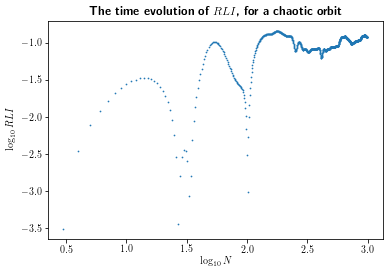

In [13]:

plt.scatter(np.log10(x), np.log10(RLI), s=0.5)
#plt.loglog(x, abs(RLI)
plt.title(r'\textbf{The time evolution of $RLI$, for a chaotic orbit}')
plt.xlabel(r'$\log_{10}N$')
plt.ylabel(r'$\log_{10} RLI$')

In [14]:
##======================perform a linear fit on the last few values===============================##
x_vec = [3900, 5000, 6000,7000]
x_vec = np.log10(np.array(vec))      #x-values 
y_vec = [LCE[3600], LCE[3900], LCE[4000], LCE[4200]]
y_vec = np.log10(np.array(y_vec))   #y-values

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: index 3600 is out of bounds for axis 0 with size 1000

In [ ]:
x_vec

In [ ]:
y_vec

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
##=============initialize parameters for the linearfit y = mx + c===========##
m0 = -0.5
c0 = 80

In [ ]:
p0 = [m0, c0]
name = ['m', 'c']

In [ ]:
def f(x, m, c):
    return m*x + c

In [ ]:
xmodel = np.log10(np.linspace(3000, 30000, 20000))
xmodel

In [ ]:
ystart = f(xmodel, *p0)

In [ ]:
plt.plot(xmodel , ystart)

In [ ]:
#udata = [0.01, 0.01, 0.01, 0.01]

In [ ]:
popt , pcov = curve_fit ( f , x_vec , y_vec , p0  , absolute_sigma=True )

In [ ]:
dymin = (y_vec-f( x_vec,*popt ))/udata
min_chisq = sum( dymin*dymin )
dof = len (x_vec) - len ( popt )

In [ ]:
print( " Chi square : " , min_chisq )
print( " Number of degrees of freedom : " , dof )
print( " Chisquare per degree of freedom : " , min_chisq/dof )
print( )

In [ ]:
print( " Fitted parameters with 68% C . I . : " )
for i , pmin in enumerate( popt ) : # enumerate i s ve ry u s e f u l !
    print( (i ,name[ i ] , pmin , np.sqrt ( pcov [ i , i ] ) * np.sqrt ( min_chisq/dof )))
print( )
perr = np . sqrt ( np . diag ( pcov ) ) # a c c o r di n g t o s ci p y documentation
print( perr )

In [ ]:
yfit = f (xmodel , * popt ) # v e c t o r i s e d

In [ ]:
yfit.shape

In [ ]:
xmodel.shape

In [ ]:
LCE.shape

In [ ]:
plt.grid()
plt.scatter(np.log10(np.linspace(0, N, N)), np.log10(LCE),marker='o',s=1)
#plt.legend([r'\textbf{Evolution of $X_{1}(t)$ }' ])
plt.plot(xmodel, yfit, '-r')
plt.legend([r'\textbf{Linear fit of the peaks in $X_{1}(t)$ }'], loc='best')
plt.title(r'\textbf{The time evolution of $X_{1}(t)$, for a regular orbit}')
plt.xlabel(r'$\log_{10}N$')
plt.ylabel(r'$\log_{10} X_{1}(t)$')
#plt.loglog(np.linspace(0, N, N), LCE)

In [ ]:
plt.loglog(np.linspace(0, N, N), error)

In [ ]:
plt.scatter(x_c1, y_c1, s=0.1)

In [ ]:
plt.scatter(x_c1, px_c, s=0.1)